![]()

# MNIST Classification

![](https://camo.githubusercontent.com/d440ac2eee1cb3ea33340a2c5f6f15a0878e9275/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067)

# 1. Import 

In [4]:
# System
import argparse
import datetime
import gc
import itertools
import os

# Numerical Data
import random

# NLP
import re

# Tools
import shutil
import sys

# Time
import time
from glob import glob

# Image

# Deep Learning - Keras - Model
import keras
import matplotlib.image as mpimg

# Graph/ Visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Deep Learning - TensorFlow
import tensorflow as tf
from IPython.display import display

# from keras.wrappers.scikit_learn import KerasClassifier
# Deep Learning - Keras - Model Parameters and Evaluation Metrics
from keras import backend as K
from keras import models, optimizers
from keras.applications.densenet import DenseNet201
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_v3 import InceptionV3
from keras.applications.nasnet import NASNetLarge, NASNetMobile, preprocess_input
from keras.applications.resnet50 import ResNet50

# Deep Learning - Keras - Pretrained Models
from keras.applications.xception import Xception

# Deep Learning - Keras - Visualisation
from keras.callbacks import (
    EarlyStopping,
    LearningRateScheduler,
    ModelCheckpoint,
    ReduceLROnPlateau,
    TensorBoard,
)

# Deep Learning - Keras - Layers
from keras.layers import (
    LSTM,
    Activation,
    Add,
    BatchNormalization,
    Bidirectional,
    Concatenate,
    Conv2D,
    Convolution1D,
    Dense,
    Dropout,
    Embedding,
    Flatten,
    GlobalAveragePooling2D,
    GlobalAvgPool1D,
    GlobalMaxPool1D,
    GlobalMaxPooling2D,
    Input,
    Lambda,
    LeakyReLU,
    MaxPool2D,
    MaxPooling1D,
    MaxPooling2D,
    Multiply,
    PReLU,
    SeparableConv1D,
    SpatialDropout1D,
    concatenate,
)
from keras.losses import binary_crossentropy, mae, sparse_categorical_crossentropy
from keras.models import Model, Sequential, load_model
from keras.optimizers import SGD, Adam, RMSprop

# Deep Learning - Keras -  Preprocessing
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from matplotlib.pyplot import figure
from mlxtend.plotting import plot_confusion_matrix
from PIL import Image

# Evaluation Metrics
# Machine Learning Models
# Preprocessing
from sklearn import metrics, preprocessing, svm
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
)

# Model Selection
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.utils import class_weight as cw
from sklearn.utils import shuffle
from tqdm import tqdm

# np.random.seed(42)

%matplotlib inline


# 2. Functions

In [5]:
def date_time(x):
    if x == 1:
        return "Timestamp: {:%Y-%m-%d %H:%M:%S}".format(datetime.datetime.now())
    if x == 2:
        return "Timestamp: {:%Y-%b-%d %H:%M:%S}".format(datetime.datetime.now())
    if x == 3:
        return "Date now: %s" % datetime.datetime.now()
    if x == 4:
        return "Date today: %s" % datetime.date.today()

# 3. Input Configuration

In [10]:
train_df = pd.read_csv("train.csv")
train_df.rename(index=str, columns={"label": "target"}, inplace=True)
train_df.head()

,target,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
test_df = pd.read_csv("test.csv")
test_df.rename(index=str, columns={"label": "target"}, inplace=True)
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 4. Visualization

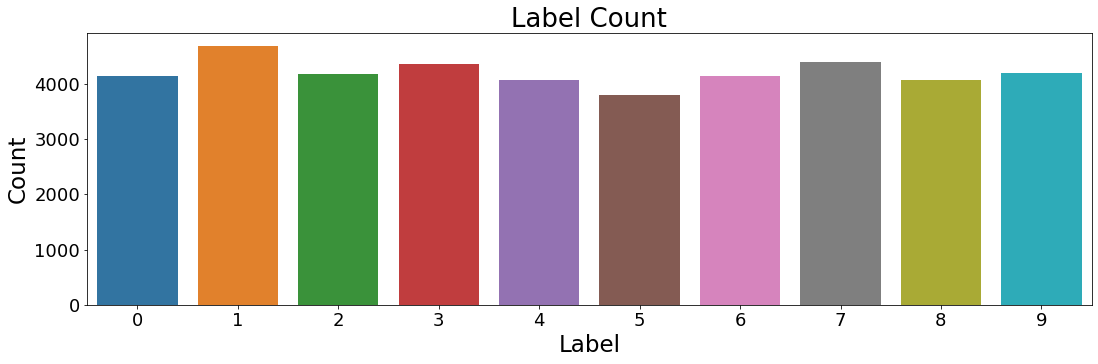

In [12]:
ticksize = 18
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 5)
params = {
    "figure.figsize": figsize,
    "axes.labelsize": labelsize,
    "axes.titlesize": titlesize,
    "xtick.labelsize": ticksize,
    "ytick.labelsize": ticksize,
}

plt.rcParams.update(params)

col = "target"
xlabel = "Label"
ylabel = "Count"

sns.countplot(x=train_df[col])
plt.title("Label Count")
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

# 5. Preprocess

In [13]:
def get_data(train_X=None, train_Y=None, test_X=None, batch_size=32):
    print("Preprocessing and Generating Data Batches.......\n")

    rescale = 1.0 / 255

    train_batch_size = batch_size
    validation_batch_size = batch_size * 5
    test_batch_size = batch_size * 5

    train_shuffle = True
    val_shuffle = True
    test_shuffle = False

    train_datagen = ImageDataGenerator(
        horizontal_flip=False,
        vertical_flip=False,
        rotation_range=10,
        #         shear_range=15,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        rescale=rescale,
        validation_split=0.25,
    )

    train_generator = train_datagen.flow(
        x=train_X,
        y=train_Y,
        batch_size=batch_size,
        shuffle=True,
        sample_weight=None,
        seed=42,
        save_to_dir=None,
        save_prefix="",
        save_format="png",
        subset="training",
    )

    validation_generator = train_datagen.flow(
        x=train_X,
        y=train_Y,
        batch_size=validation_batch_size,
        shuffle=False,
        sample_weight=None,
        seed=42,
        save_to_dir=None,
        save_prefix="",
        save_format="png",
        subset="validation",
    )

    test_datagen = ImageDataGenerator(rescale=rescale)

    test_generator = test_datagen.flow(
        x=test_X,
        y=None,
        batch_size=test_batch_size,
        shuffle=False,
        sample_weight=None,
        seed=42,
        save_to_dir=None,
        save_prefix="",
        save_format="png",
    )

    class_weights = get_weight(np.argmax(train_Y, axis=1))

    steps_per_epoch = len(train_generator)
    validation_steps = len(validation_generator)

    print("\nPreprocessing and Data Batch Generation Completed.\n")

    return (
        train_generator,
        validation_generator,
        test_generator,
        class_weights,
        steps_per_epoch,
        validation_steps,
    )


# Calculate Class Weights
def get_weight(y):
    class_weight_current = cw.compute_class_weight("balanced", np.unique(y), y)
    return class_weight_current

# 5. Model Function

In [14]:
def get_model(
    model_name,
    input_shape=(96, 96, 3),
    num_class=2,
    weights="imagenet",
    dense_units=1024,
    internet=False,
):
    inputs = Input(input_shape)

    if model_name == "Xception":
        base_model = Xception(
            include_top=False, weights=weights, input_shape=input_shape
        )
    elif model_name == "ResNet50":
        base_model = ResNet50(
            include_top=False, weights=weights, input_shape=input_shape
        )
    elif model_name == "ResNet101":
        base_model = keras.applications.resnet.ResNet101(
            include_top=False, weights=weights, input_shape=input_shape
        )
    elif model_name == "ResNet152":
        base_model = keras.applications.resnet.ResNet152(
            include_top=False, weights=weights, input_shape=input_shape
        )
    elif model_name == "ResNet50V2":
        base_model = resnet_v2.ResNet50V2(
            include_top=False, weights=weights, input_shape=input_shape
        )
    elif model_name == "ResNet101V2":
        base_model = resnet_v2.ResNet101V2(
            include_top=False, weights=weights, input_shape=input_shape
        )
    elif model_name == "ResNet152V2":
        base_model = resnet_v2.ResNet152V2(
            include_top=False, weights=weights, input_shape=input_shape
        )
    elif model_name == "ResNeXt50":
        base_model = resnext.ResNeXt50(
            include_top=False, weights=weights, input_shape=input_shape
        )
    elif model_name == "ResNeXt101":
        base_model = resnext.ResNeXt101(
            include_top=False, weights=weights, input_shape=input_shape
        )
    elif model_name == "InceptionV3":
        base_model = InceptionV3(
            include_top=False, weights=weights, input_shape=input_shape
        )
    elif model_name == "InceptionResNetV2":
        base_model = InceptionResNetV2(
            include_top=False, weights=weights, input_shape=input_shape
        )
    elif model_name == "DenseNet201":
        base_model = DenseNet201(
            include_top=False, weights=weights, input_shape=input_shape
        )
    elif model_name == "NASNetMobile":
        base_model = NASNetMobile(
            include_top=False, weights=weights, input_shape=input_shape
        )
    elif model_name == "NASNetLarge":
        base_model = NASNetLarge(
            include_top=False, weights=weights, input_shape=input_shape
        )

    #     x = base_model(inputs)
    #     x = Dropout(0.5)(x)

    #     out1 = GlobalMaxPooling2D()(x)
    #     out2 = GlobalAveragePooling2D()(x)
    #     out3 = Flatten()(x)

    #     out = Concatenate(axis=-1)([out1, out2, out3])

    #     out = Dropout(0.6)(out)
    #     out = BatchNormalization()(out)
    #     out = Dropout(0.5)(out)

    #     if num_class>1:
    #         out = Dense(num_class, activation="softmax", name="3_")(out)
    #     else:
    #         out = Dense(1, activation="sigmoid", name="3_")(out)

    #     model = Model(inputs, out)
    #     model = Model(inputs=base_model.input, outputs=outputs)

    x = base_model.output
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = Dense(dense_units)(x)
    x = BatchNormalization()(x)
    x = Activation(activation="relu")(x)
    x = Dropout(0.5)(x)

    if num_class > 1:
        outputs = Dense(num_class, activation="softmax")(x)
    else:
        outputs = Dense(1, activation="sigmoid")(x)

    model = Model(inputs=base_model.input, outputs=outputs)

    model.summary()

    return model


# def get_conv_model(num_class=2, input_shape=None, dense_size=256):
#     model = Sequential()

#     model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation ='relu', input_shape = input_shape))
#     model.add(BatchNormalization())
#     model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation ='relu', kernel_regularizer=l2(1e-4)))
#     model.add(BatchNormalization())

#     model.add(MaxPool2D(pool_size=(2,2)))
#     model.add(Dropout(0.25))


#     model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu', kernel_regularizer=l2(1e-4)))
#     model.add(BatchNormalization())
#     model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu', kernel_regularizer=l2(1e-4)))
#     model.add(BatchNormalization())

#     model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#     model.add(Dropout(0.25))


#     model.add(Flatten())
#     model.add(Dense(256, activation = "relu"))
#     model.add(Dropout(0.5))


# #     model.add(Conv2D(32, (3, 3), padding='same', use_bias=False, kernel_regularizer=l2(1e-4), input_shape = input_shape))
# #     model.add(BatchNormalization())
# #     model.add(Activation('relu'))

# #     model.add(Conv2D(32, (3, 3), padding='same', use_bias=False, kernel_regularizer=l2(1e-4)))
# #     model.add(BatchNormalization())
# #     model.add(Activation('relu'))

# #     model.add(MaxPool2D())
# #     model.add(Dropout(0.5))


# #     model.add(Conv2D(64, (3, 3), padding='same', use_bias=False, kernel_regularizer=l2(1e-4)))
# #     model.add(BatchNormalization())
# #     model.add(Activation('relu'))

# #     model.add(Conv2D(64, (3, 3), padding='same', use_bias=False, kernel_regularizer=l2(1e-4)))
# #     model.add(BatchNormalization())
# #     model.add(Activation('relu'))

# #     model.add(MaxPool2D())
# #     model.add(Dropout(0.5))


# #     model.add(GlobalAveragePooling2D())


#     if num_class>1:
#         model.add(Dense(num_class, activation='softmax'))
#     else:
#         model.add(Dense(num_class, activation='sigmoid'))

#     print(model.summary())

#     return model


def get_conv_model(num_class=2, input_shape=None, dense_units=256):
    model = Sequential()

    model.add(
        Conv2D(
            filters=32,
            kernel_size=(5, 5),
            padding="Same",
            activation="relu",
            input_shape=input_shape,
        )
    )
    model.add(BatchNormalization())
    model.add(
        Conv2D(
            filters=32,
            kernel_size=(5, 5),
            padding="Same",
            activation="relu",
            kernel_regularizer=l2(1e-4),
        )
    )
    model.add(BatchNormalization())

    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(
        Conv2D(
            filters=64,
            kernel_size=(3, 3),
            padding="Same",
            activation="relu",
            kernel_regularizer=l2(1e-4),
        )
    )
    model.add(BatchNormalization())
    model.add(
        Conv2D(
            filters=64,
            kernel_size=(3, 3),
            padding="Same",
            activation="relu",
            kernel_regularizer=l2(1e-4),
        )
    )
    model.add(BatchNormalization())

    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(dense_units, activation="relu"))
    model.add(Dropout(0.5))

    #     model.add(Conv2D(32, (3, 3), padding='same', use_bias=False, kernel_regularizer=l2(1e-4), input_shape = input_shape))
    #     model.add(BatchNormalization())
    #     model.add(Activation('relu'))

    #     model.add(Conv2D(32, (3, 3), padding='same', use_bias=False, kernel_regularizer=l2(1e-4)))
    #     model.add(BatchNormalization())
    #     model.add(Activation('relu'))

    #     model.add(MaxPool2D())
    #     model.add(Dropout(0.5))

    #     model.add(Conv2D(64, (3, 3), padding='same', use_bias=False, kernel_regularizer=l2(1e-4)))
    #     model.add(BatchNormalization())
    #     model.add(Activation('relu'))

    #     model.add(Conv2D(64, (3, 3), padding='same', use_bias=False, kernel_regularizer=l2(1e-4)))
    #     model.add(BatchNormalization())
    #     model.add(Activation('relu'))

    #     model.add(MaxPool2D())
    #     model.add(Dropout(0.5))

    #     model.add(GlobalAveragePooling2D())

    if num_class > 1:
        model.add(Dense(num_class, activation="softmax"))
    else:
        model.add(Dense(num_class, activation="sigmoid"))

    print(model.summary())

    return model

## Visualization Function

In [15]:
def plot_performance(history=None, figure_directory=None):
    xlabel = "Epoch"
    legends = ["Training", "Validation"]

    ylim_pad = [0.005, 0.005]
    ylim_pad = [0, 0]

    plt.figure(figsize=(20, 5))

    # Plot training & validation Accuracy values

    y1 = history.history["accuracy"]
    y2 = history.history["val_accuracy"]

    min_y = min(min(y1), min(y2)) - ylim_pad[0]
    max_y = max(max(y1), max(y2)) + ylim_pad[0]

    #     min_y = .96
    #     max_y = 1

    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title("Model Accuracy\n" + date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel("Accuracy", fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc="upper left")
    plt.grid()

    # Plot training & validation loss values

    y1 = history.history["loss"]
    y2 = history.history["val_loss"]

    min_y = min(min(y1), min(y2)) - ylim_pad[1]
    max_y = max(max(y1), max(y2)) + ylim_pad[1]

    #     min_y = .1
    #     max_y = 0

    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title("Model Loss\n" + date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel("Loss", fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc="upper left")
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory + "/history")

    plt.show()

# 6. Output Configuration

In [16]:

model_file = (
    "{epoch:02d}-val_acc-{val_acc:.2f}-val_loss-{val_loss:.2f}.hdf5"
)

## 6.2 Call Back Configuration

In [17]:
print("Settting Callbacks")


def step_decay(epoch, lr):
    # initial_lrate = 1.0 # no longer needed
    lrate = lr
    if epoch == 2:
        lrate = 0.0001
    #     lrate = lr * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate


checkpoint = ModelCheckpoint(model_file, monitor="val_acc", save_best_only=True)

early_stopping = EarlyStopping(
    monitor="val_loss", patience=10, verbose=1, restore_best_weights=True
)


reduce_lr = ReduceLROnPlateau(
    monitor="val_loss", factor=0.6, patience=2, min_lr=0.0000001, verbose=1
)

learning_rate_scheduler = LearningRateScheduler(step_decay, verbose=1)
# f1_metrics = Metrics()


callbacks = [reduce_lr, early_stopping]
# callbacks = [checkpoint, reduce_lr, early_stopping]
# callbacks = [reduce_lr, early_stopping, f1_metrics]

print("Set Callbacks at ", date_time(1))

Settting Callbacks
Set Callbacks at  Timestamp: 2021-06-12 18:12:31


# 7. Model

In [18]:
print("Getting Base Model", date_time(1))

# model_name="InceptionV3"
# model_name="NASNetMobile"

dim = 28

input_shape = (dim, dim, 1)


num_class = len(set(train_df["target"].values))

weights = "imagenet"
dense_units = 256

# internet = True

# model = get_model(model_name=model_name,
#                   input_shape=input_shape,
#                   num_class=num_class,
#                   weights=weights,
#                   dense_units=dense_units,
#                   internet=internet)

model = get_conv_model(
    num_class=num_class, input_shape=input_shape, dense_units=dense_units
)
print("Loaded Base Model", date_time(1))

Getting Base Model Timestamp: 2021-06-12 18:12:34
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d

In [19]:
loss = "categorical_crossentropy"
# loss = 'binary_crossentropy'
metrics = ["accuracy"]
# metrics = [auroc]

# 8. Data

In [20]:
# train_X = train_df.drop(columns=["target"]).values
# train_Y = train_df["target"].values


# clf = svm.SVC()

# cross_val_score(clf, train_X, train_Y, cv=10, n_jobs=-1, verbose=2)

In [21]:
train_X = train_df.drop(columns=["target"]).values
train_X = train_X.reshape(train_X.shape[0], dim, dim, 1)

train_Y = train_df["target"].values
train_Y = keras.utils.to_categorical(train_Y, 10)

test_X = test_df.values
test_X = test_X.reshape(test_X.shape[0], dim, dim, 1)

In [22]:
batch_size = 128

# class_mode = "categorical"
# class_mode = "binary"

# target_size = (dim, dim)

(
    train_generator,
    validation_generator,
    test_generator,
    class_weights,
    steps_per_epoch,
    validation_steps,
) = get_data(train_X=train_X, train_Y=train_Y, test_X=test_X, batch_size=batch_size)

Preprocessing and Generating Data Batches.......


Preprocessing and Data Batch Generation Completed.



A:\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1 2 3 4 5 6 7 8 9], y=[1 0 1 ... 7 6 9] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


# 9. Training

In [23]:
print("Starting Trainning ...\n")

start_time = time.time()
print(date_time(1))

# batch_size = 32
# train_generator, validation_generator, test_generator, class_weights, steps_per_epoch, validation_steps = get_data(batch_size=batch_size)

print("\n\nCompliling Model ...\n")
learning_rate = 0.001
optimizer = Adam(learning_rate)
# optimizer = Adam()

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

verbose = 1
epochs = 100

print("Trainning Model ...\n")
history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    verbose=verbose,
    callbacks=callbacks,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    class_weight=class_weights,
)

elapsed_time = time.time() - start_time
elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

print("\nElapsed Time: " + elapsed_time)
print("Completed Model Trainning", date_time(1))

Starting Trainning ...

Timestamp: 2021-06-12 18:13:05


Compliling Model ...

Trainning Model ...

Instructions for updating:
Please use Model.fit, which supports generators.


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# 10. Model Performance 
Model Performance  Visualization over the Epochs

In [24]:
plot_performance(history=history)

NameError: name 'history' is not defined

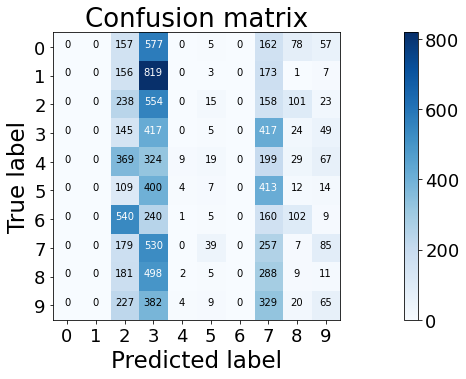

In [25]:
def plot_confusion_matrix(
    cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues
):

    ticksize = 18
    titlesize = ticksize + 8
    labelsize = ticksize + 5

    figsize = (18, 5)
    params = {
        "figure.figsize": figsize,
        "axes.labelsize": labelsize,
        "axes.titlesize": titlesize,
        "xtick.labelsize": ticksize,
        "ytick.labelsize": ticksize,
    }

    plt.rcParams.update(params)

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

    plt.show()


# Predict the values from the validation dataset
Y_pred = model.predict(validation_generator)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(validation_generator.y, axis=1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes=range(10))

In [20]:
ypreds = model.predict_generator(
    generator=test_generator, steps=len(test_generator), verbose=1
)
# ypreds

44/44 [==============================] - 1s 32ms/step


In [21]:
# ypred = ypreds[:,1]#
ypred = np.argmax(ypreds, axis=1)

In [22]:
sample_df = pd.read_csv(input_directory + "sample_submission.csv")
sample_df.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [23]:
test_gen_id = test_generator.index_array
sample_submission_id = sample_df["ImageId"]

len(test_gen_id), len(sample_submission_id)

(28000, 28000)

In [24]:
test_generator.index_array

array([    0,     1,     2, ..., 27997, 27998, 27999])

In [25]:
sample_list = list(sample_df.ImageId)

ids = [x + 1 for x in test_generator.index_array]


pred_dict = dict((key, value) for (key, value) in zip(ids, ypred))

pred_list_new = [pred_dict[f] for f in sample_list]

test_df = pd.DataFrame({"ImageId": sample_list, "Label": pred_list_new})

test_df.to_csv("submission.csv", header=True, index=False)

In [26]:
test_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
